<a href="https://colab.research.google.com/github/cserock/colab-examples/blob/main/06_RNN_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Neural Network)

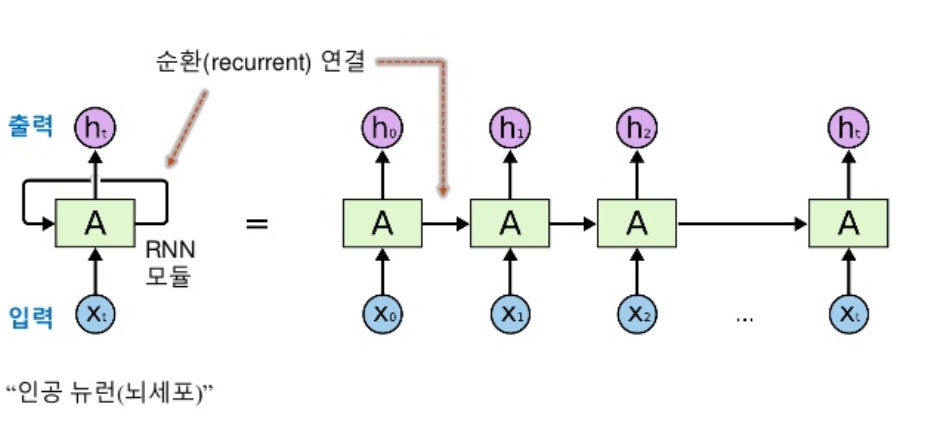

- 순환 신경망 , 스퀀스 데이터 (연속형 데이터) 처리에 유리한 인공신경망
- 이전 입력정보(과거)를 현재의 계산에 반영
- 순차적인 의존성을 학습

활용분야
- 자연어 처리
- 음성인식
- 시계열 예측
- 비디오 분석

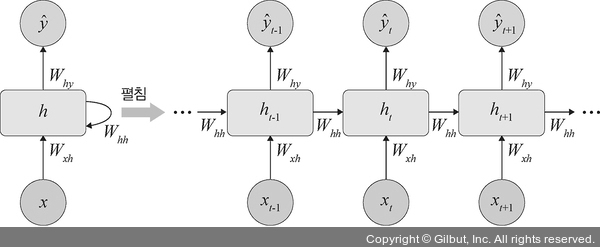

RNN의 수식

$$
h_t = \tanh(W_{hx}x_t + W_{hh}h_{t-1} + b_h)
$$

- $x_t$: 현재 입력 벡터 (예: 단어 임베딩 벡터)
- $h_{t-1}$: 이전 시간 스텝의 은닉 상태
- $W_{hx}$, $W_{hh}$: 가중치 행렬
- $b_h$: 바이어스 벡터
- $\tanh$: 비선형 활성화 함수

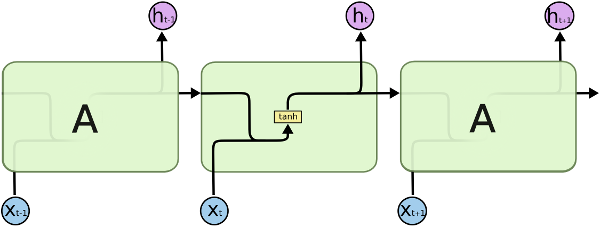

출력값
$$
y_t = W_{hy}h_t + b_y
$$

- $W_{hy}$: 은닉 상태에서 출력으로의 가중치 행렬
- $b_y$: 바이어스 벡터

---

# RNN 훈련

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 전처리
max_features = 10000  # 가장 많이 사용된 단어의 수
maxlen = 500          # 시퀀스의 최대 길이

print('데이터 불러오는 중...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f'훈련 샘플: {len(x_train)}, 테스트 샘플: {len(x_test)}')

print('시퀀스 패딩 중...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('시퀀스 패딩 완료')

데이터 불러오는 중...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 샘플: 25000, 테스트 샘플: 25000
시퀀스 패딩 중...
시퀀스 패딩 완료


In [ ]:
# 2. SimpleRNN 모델 구축
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(SimpleRNN(units=32))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 4. 모델 학습
print('SimpleRNN 모델 학습 중...')
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

SimpleRNN 모델 학습 중...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 0.5636 - loss: 0.6750 - val_accuracy: 0.7432 - val_loss: 0.5187
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.8142 - loss: 0.4156 - val_accuracy: 0.6944 - val_loss: 0.5673
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.8502 - loss: 0.3725 - val_accuracy: 0.8338 - val_loss: 0.3969
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.9426 - loss: 0.1644 - val_accuracy: 0.8212 - val_loss: 0.4314
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.9834 - loss: 0.0711 - val_accuracy: 0.8094 - val_loss: 0.5016
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.9968 - loss: 0.0233 - val_accuracy: 0.8350 - val_loss: 0.5327
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.9988 - loss: 0.0108 - val_accuracy: 0.7990 - val_loss: 0.6405
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - accur

---